# ОПРЕДЕЛЕНИЕ ПЕРСПЕКТИВНОГО ТАРИФА ДЛЯ ТЕЛЕКОМ КОМПАНИИ

   У федерального оператора сотовой связи "Мегалайн" имеется два тарифных плана: "Смарт" и "Ультра". Коммерческому департаменту предстоит скорректировать рекламный бюджет, наша задача определить, какой тариф приносит больше денег. Для получения ответа на этот вопрос будем проверять две гипотезы: "средняя выручка пользователей тарифов "Ультра" и "Смарт" различается" и "средняя выручка пользователей из Москвы отличается от выручки пользователей других регионов". 

   Входные данные для исследования - небольшая выборка клиентов (500 пользователей). Данные содержат информацию о пользователях, о звонках, сообщениях и интернет-сессиях и информацию о тарифах.

   Перед нами стоят следующие задачи:

- изучить и обработать данные(дубликаты, пропуски, типы данных);
- посчитать помесячную выручку с каждого пользователя;
- провести исследовательский анализ данных(описание значений, графики, выбросы, дисперсия и стандартное отклонение);
- провести статистический анализ данных(проверка гипотез);
- сделать вывод.

## ИЗУЧЕНИЕ ДАННЫХ

In [1]:
# Отключаем предупреждения 
import warnings
warnings.filterwarnings('ignore')

# Импортируем библиотеки и получим общую информацию по таблицам
import pandas as pd

Посмотрим, как выглядят данные в таблицах, выведем несколько первых строк.

In [3]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Посмотрим, сколько пользователей на каждом тарифе.

In [4]:
print('Количество пользователей с тарифом SMART', len(users.query('tariff == "smart"')))

Количество пользователей с тарифом SMART 351


In [5]:
print('Количество пользователей с тарифом ULTRA', len(users.query('tariff == "ultra"')))

Количество пользователей с тарифом ULTRA 149


In [6]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### ВЫВОД
Данные в таблицах содержат даты в неправильном формате, а так же пропущенные значения, проведем предобработку данных на следующем этапе.

## ПРЕДОБРАБОТКА ДАННЫХ

Приведем данные в таблицах к нужным типам. Даты должны быть в формате datetime,

In [10]:
# с помощью метода to_datatime изменим формат данных на нужный

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d')

users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y.%m.%d')

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d')

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%d')

Проверим данные в каждой таблице на предмет пропусков и дубликатов.

In [11]:
users.duplicated().sum()

0

Выведем на экран уникальные значения названий городов, "вручную" просмотрим, нет ли дублирующих названий.

In [12]:
users.city.unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Города не дублируются, названия не искажены.

In [13]:
users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

В таблице с информацией о пользователях нет дубликатов, в столбце с датой прекращения пользования тарифом почти все значения пропущены, но пропуски вероятно говорят о том, что пользование тарифом не завершено.

In [14]:
calls.duplicated().sum()

0

In [15]:
calls.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Посмотрим описание значений в столбце с длительностью звонков.

In [16]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [17]:
calls.query('duration == 0').count()

id           39613
call_date    39613
duration     39613
user_id      39613
dtype: int64

Минимальная длительность звонка - 0 секунд, и таких значений почти 20% - это много, возможно это пропущенные звонки - т.е. вызов был, но абонент не ответил, соответственно и разговора не было, длительность равна 0.

In [18]:
messages.duplicated().sum()

0

In [19]:
messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [20]:
internet.duplicated().sum()

0

In [21]:
internet.isnull().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [22]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

В значениях использованного трафика ноль тоже не является неожиданностью, к примеру, пожилые люди редко пользуются интернетом.

In [23]:
calls['month'] = calls['call_date'].dt.month_name()
calls['month'].head(5).to_frame()

,month
0,July
1,August
2,June
3,September
4,December


In [24]:
calls = calls.rename(columns={'duration' : 'call_duration'})
calls.head()

,id,call_date,call_duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,July
1,1000_1,2018-08-17,0.00,1000,August
2,1000_2,2018-06-11,2.85,1000,June
3,1000_3,2018-09-21,13.80,1000,September
4,1000_4,2018-12-15,5.18,1000,December


«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Поэтому добавим округление длительности звонка в большую сторону до 1 минуты и интернет трафика до 1 Mb.

In [25]:
import math # вызываем библиотеку math
# с помощью apply применяем округление до верхнего значения ко всему столбцу
calls['call_duration'] = calls['call_duration'].apply(math.ceil) 
calls.head()

,id,call_date,call_duration,user_id,month
0,1000_0,2018-07-25,0,1000,July
1,1000_1,2018-08-17,0,1000,August
2,1000_2,2018-06-11,3,1000,June
3,1000_3,2018-09-21,14,1000,September
4,1000_4,2018-12-15,6,1000,December


In [26]:
# сгруппируем таблицу звонков по id пользовтеля и месяцам, когда были сделаны звонки, и посчитаем их количество

calls_group = calls.groupby(['user_id', 'month'])['id'].count().reset_index()
calls_group.tail(5)

,user_id,month,id
3169,1498,September,59
3170,1499,December,69
3171,1499,November,74
3172,1499,October,68
3173,1499,September,9


In [27]:
# переименуем столюец 'id' в 'count' (количество)

calls_group = calls_group.rename(columns={'id' : 'count'})
calls_group.head(5)

,user_id,month,count
0,1000,August,52
1,1000,December,46
2,1000,July,47
3,1000,June,43
4,1000,May,22


In [28]:
# сгруппируем таблицу звонков по id пользовтеля и месяцам, когда были сделаны звонки, и посчитаем их продолжительность в минутах

calls_group_duration = calls.groupby(['user_id', 'month'])['call_duration'].sum().reset_index()
calls_group_duration.head(5)

,user_id,month,call_duration
0,1000,August,408
1,1000,December,333
2,1000,July,340
3,1000,June,172
4,1000,May,159


In [29]:
# соединим две таблицы, чтобы видеть количество звонков и их продолжительность

calls_group_final = calls_group.merge(calls_group_duration, how='outer')
calls_group_final.head(5)

,user_id,month,count,call_duration
0,1000,August,52,408
1,1000,December,46,333
2,1000,July,47,340
3,1000,June,43,172
4,1000,May,22,159


In [30]:
# добавим в таблицу с сообщениями месяц отправки

messages['month'] = messages['message_date'].dt.month_name()
messages.head(5)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,June
1,1000_1,2018-10-08,1000,October
2,1000_2,2018-08-04,1000,August
3,1000_3,2018-06-16,1000,June
4,1000_4,2018-12-05,1000,December


In [31]:
# сгруппируем таблицу по id пользователя и месяцу, когда было отправлено сообщения, и посчитаем их количество для каждого месяца

messages_group = messages.groupby(['user_id','month'])['id'].count().reset_index()
messages_group = messages_group.rename(columns={'id' : 'messages_count'})
messages_group.head(5)

,user_id,month,messages_count
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22


In [32]:
# добавим в таблицу с интернетом месяц использования

internet['month'] = internet['session_date'].dt.month_name()
internet.head(5)

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,November
1,1000_1,1052.81,2018-09-07,1000,September
2,1000_2,1197.26,2018-06-25,1000,June
3,1000_3,550.27,2018-08-22,1000,August
4,1000_4,302.56,2018-09-24,1000,September


In [33]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
 4   month         149396 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 6.8+ MB


Оценим, сколько в таблице нулевых значений в столбце с использованным трафиком.

In [34]:
internet.query('mb_used == 0').count()

id              19598
mb_used         19598
session_date    19598
user_id         19598
month           19598
dtype: int64

13 % от числа всех интернет - сессий, это довольно много. Отметим, что есть категории пользователей, которые не используют интернет - например, пожилие люди, дети или это может быть рабочий телефон, который используется только для звонков.

In [35]:
# с помощью apply применяем округление до верхнего значения ко всему столбцу
internet['mb_used'] = internet['mb_used'].apply(math.ceil) 
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,November
1,1000_1,1053,2018-09-07,1000,September
2,1000_2,1198,2018-06-25,1000,June
3,1000_3,551,2018-08-22,1000,August
4,1000_4,303,2018-09-24,1000,September


In [36]:
# сгруппируем таблицу по id пользователя и месяцу и посчитаем объем трафика по каждому месяцу

internet_group = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
internet_group.head(5)

,user_id,month,mb_used
0,1000,August,14070
1,1000,December,9827
2,1000,July,14016
3,1000,June,23257
4,1000,May,2256


Посчитаем помесячную выручку с каждого пользователя. Соединим всю посчитанную информацию в одну таблицу.

In [37]:
# объединяем информацию по продолжительности звонков с информацией по количеству сообщений

general_info = calls_group_duration.merge(messages_group, how='outer')
general_info.head(5)

,user_id,month,call_duration,messages_count
0,1000,August,408.0,81.0
1,1000,December,333.0,70.0
2,1000,July,340.0,75.0
3,1000,June,172.0,60.0
4,1000,May,159.0,22.0


In [38]:
# добавляем информацию по объему интернет-трафика

general_info = general_info.merge(internet_group, how='outer')
general_info.head(5)

,user_id,month,call_duration,messages_count,mb_used
0,1000,August,408.0,81.0,14070.0
1,1000,December,333.0,70.0,9827.0
2,1000,July,340.0,75.0,14016.0
3,1000,June,172.0,60.0,23257.0
4,1000,May,159.0,22.0,2256.0


Создадим общую таблицу с информацией по использованию тарифа пользователями и названием тарифа

In [39]:
# добавляем в таблицу столбец с названием тарифа

general_info = general_info.merge(users[['user_id', 'tariff']], how='left')
general_info.head(5)

,user_id,month,call_duration,messages_count,mb_used,tariff
0,1000,August,408.0,81.0,14070.0,ultra
1,1000,December,333.0,70.0,9827.0,ultra
2,1000,July,340.0,75.0,14016.0,ultra
3,1000,June,172.0,60.0,23257.0,ultra
4,1000,May,159.0,22.0,2256.0,ultra


Добавим в таблицу характеристики тарифов.

In [40]:
general_info = general_info.rename(columns={'tariff' : 'tariff_name'}) # переименуем столбец для объединения

general_info = general_info.merge(tariffs, on='tariff_name', how='outer') # переносим все данные из таблицы тарифы

general_info.head(5)

,user_id,month,call_duration,messages_count,mb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,408.0,81.0,14070.0,ultra,1000,30720,3000,1950,150,1,1
1,1000,December,333.0,70.0,9827.0,ultra,1000,30720,3000,1950,150,1,1
2,1000,July,340.0,75.0,14016.0,ultra,1000,30720,3000,1950,150,1,1
3,1000,June,172.0,60.0,23257.0,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,159.0,22.0,2256.0,ultra,1000,30720,3000,1950,150,1,1


Проверим получившуюся таблицу на наличие пропусков.

In [41]:
general_info.isnull().sum()

user_id                    0
month                      0
call_duration             40
messages_count           497
mb_used                   11
tariff_name                0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

Заменим пропуски нулями, тк вероятнее всего пользователи просто не совершали звонков, не писали сообщения и не пользовались интернетом, поэтому значение отсутствует.

In [42]:
general_info = general_info.fillna(0)
general_info.isnull().sum()

user_id                  0
month                    0
call_duration            0
messages_count           0
mb_used                  0
tariff_name              0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

Разделим наши данные по тарифам на 2 таблицы: по двум тарифам "SMART" и "ULTRA".

In [43]:
# с помощью метода query() делаем срезы исходной таблицы по тарифам

info_ultra = general_info.query('tariff_name == "ultra"')
info_smart = general_info.query('tariff_name == "smart"')

In [44]:
print('Общее количество пользователей', len(general_info['user_id'].unique()))

Общее количество пользователей 498


In [45]:
print('Количество пользователей с тарифом SMART', len(info_smart['user_id'].unique()))
print('Количество пользователей с тарифом ULTRA', len(info_ultra['user_id'].unique()))

Количество пользователей с тарифом SMART 350
Количество пользователей с тарифом ULTRA 148


Посчитаем помесячную плату за звонки с каждого пользователя.

In [46]:
import numpy as np # вызываем библиотеку numpy

# напишем функцию, которая будем считать помесячную выручку с каждого пользователя

def monthly_prooceeds(row):
    messages = (row['messages_count'] - row['messages_included']) * row['rub_per_message']
    minutes = (row['call_duration'] - row['minutes_included']) * row['rub_per_minute']
    mb = np.ceil((row['mb_used'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb']
    cost = 0
    for i in [messages, minutes, mb]:
        if i > 0:
            cost += i
    return cost + row['rub_monthly_fee']

# вызываем функцию для таблицы с тарифмом ULTRA, добавляем результат в столбец - "monthly_proceeds"(месячная выручка)

info_ultra['monthly_proceeds'] = info_ultra.apply(lambda x: monthly_prooceeds(x), axis=1)
info_ultra[['user_id', 'month', 'monthly_proceeds']].head()

,user_id,month,monthly_proceeds
0,1000,August,1950.0
1,1000,December,1950.0
2,1000,July,1950.0
3,1000,June,1950.0
4,1000,May,1950.0


In [47]:
# посмотрим описание значений полученного столбца

info_ultra['monthly_proceeds'].describe()

count     985.000000
mean     2071.065990
std       378.802377
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: monthly_proceeds, dtype: float64

Посмотрим, сколько пользователей применяют услуги сверх тарифа

In [48]:
print('Количество звонков сверх тарифа SMART', len((info_smart.query('call_duration > 500')).groupby('user_id')))

Количество звонков сверх тарифа SMART 213


In [49]:
print('Количество сообщений сверх тарифа SMART', len((info_smart.query('messages_count > 50')).groupby('user_id')))

Количество сообщений сверх тарифа SMART 125


In [50]:
print('Объем интернет-трафика сверх тарифа SMART', len((info_smart.query('mb_used > 15360')).groupby('user_id')))

Объем интернет-трафика сверх тарифа SMART 312


Посчитаем общую помесячную выручку для каждого пользователя на тарифе SMART.

In [51]:
# вызываем функцию для таблицы с тарифом SMART, добавляем результат в столбец - "monthly_proceeds"(месячная выручка)

info_smart['monthly_proceeds'] = info_smart.apply(lambda x: monthly_prooceeds(x), axis=1)
info_smart[['user_id', 'month', 'monthly_proceeds']].head()

,user_id,month,monthly_proceeds
985,1001,December,550.0
986,1001,November,1350.0
987,1002,August,1550.0
988,1002,December,1150.0
989,1002,July,1150.0


In [52]:
# посмотрим описание значений полученного столбца

info_smart['monthly_proceeds'].describe()

count    2229.000000
mean     1294.639300
std       820.933202
min       550.000000
25%       550.000000
50%      1038.000000
75%      1750.000000
max      6770.000000
Name: monthly_proceeds, dtype: float64

Посчитаем общую помесячную выручку для каждого пользователя на тарифе ULTRA.

In [53]:
print('Количество звонков сверх тарифа ULTRA', len((info_ultra.query('call_duration > 3000')).groupby('user_id'))) 

Количество звонков сверх тарифа ULTRA 0


In [54]:
print('Количество сообщений сверх тарифа ULTRA', len((info_ultra.query('messages_count > 1000')).groupby('user_id'))) 

Количество сообщений сверх тарифа ULTRA 0


In [55]:
print('Объем трафика сверх тарифа ULTRA', len((info_ultra.query('mb_used > 30720')).groupby('user_id')))

Объем трафика сверх тарифа ULTRA 43


### ВЫВОД
Заметим, что пользователи тарифа ULTRA в общей массе укладываются в абонентскую плату, пользователи SMARTа выходят за пределы тарифа.

## АНАЛИЗ ДАННЫХ

Посмотрим, как пользуются тарифом SMART, оценим количественные показатели(минуты разговора, количество сообщений и объем-интернет трафика).

In [56]:
info_smart['call_duration'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: call_duration, dtype: float64

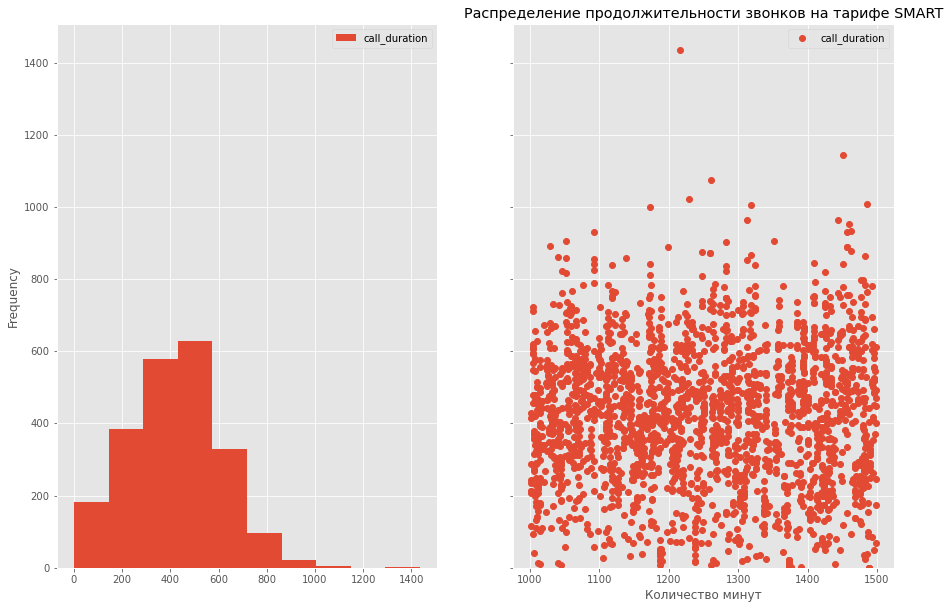

In [104]:
# построим гистограмму и диаграмму рассеяния по длительности звонков на тарифе SMART

import matplotlib.pyplot as plt # импортируем библиотеку
fig, axes = plt.subplots(1, 2, sharey=True)
plt.style.use('ggplot') # выбираем оформление в стиле ggplot
plt.rcParams["figure.figsize"] = (15,10) # размеры графика

# гистограмма
info_smart.plot(
    kind='hist',
    y='call_duration',
    grid=True,
    bins=10,
    ax=axes[0]
)

# диаграмма рассеяния
info_smart.plot(
    x='user_id',
    y='call_duration', 
    style='o', 
    grid=True,
    ax=axes[1]
)
plt.ylabel('Частота') # название оси ординат
plt.xlabel('Количество минут') # название оси абцисс
plt.title('Распределение продолжительности звонков на тарифе SMART') # заголовок графика
plt.show()

Четко видим преобладающие количество минут, которое тратят пользователи в среднем. Уберем выбросы из выборки, ограничим количество использованных минут от 100 до 700, построим гистограмму по новым значениям.

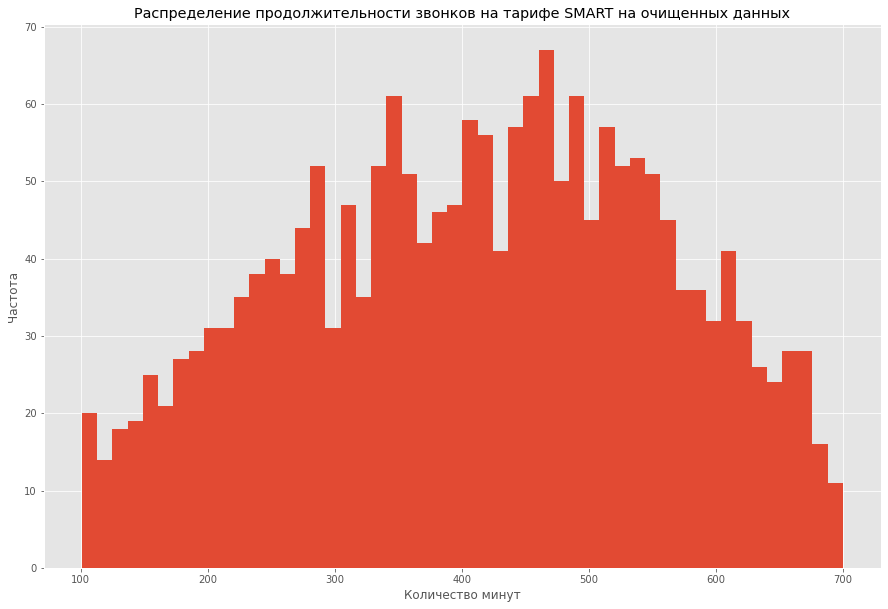

In [58]:
# делаем срез данных по длительности звонков за месяц и строим новую гистограмму методом hist()

info_smart_slice = info_smart.query('100 <= call_duration <= 700')
info_smart_slice.hist('call_duration', bins=50)
plt.ylabel('Частота') # название оси ординат
plt.xlabel('Количество минут') # название оси абцисс
plt.title('Распределение продолжительности звонков на тарифе SMART на очищенных данных') # заголовок графика
plt.show()

In [59]:
info_smart_slice['call_duration'].describe()

count    1957.000000
mean      411.073071
std       146.525751
min       101.000000
25%       297.000000
50%       418.000000
75%       527.000000
max       700.000000
Name: call_duration, dtype: float64

In [60]:
# Вычисляем дисперсию

import numpy as np # вызываем бибилиотеку numpy

var_calls_smart = np.var(info_smart['call_duration'], ddof=1)
var_calls_smart

36219.315784344246

In [61]:
# Вычисляем стандартное отклонение

std_calls_smart = np.std(info_smart['call_duration'], ddof=1)
std_calls_smart

190.3137298892128

In [62]:
info_smart['messages_count'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_count, dtype: float64

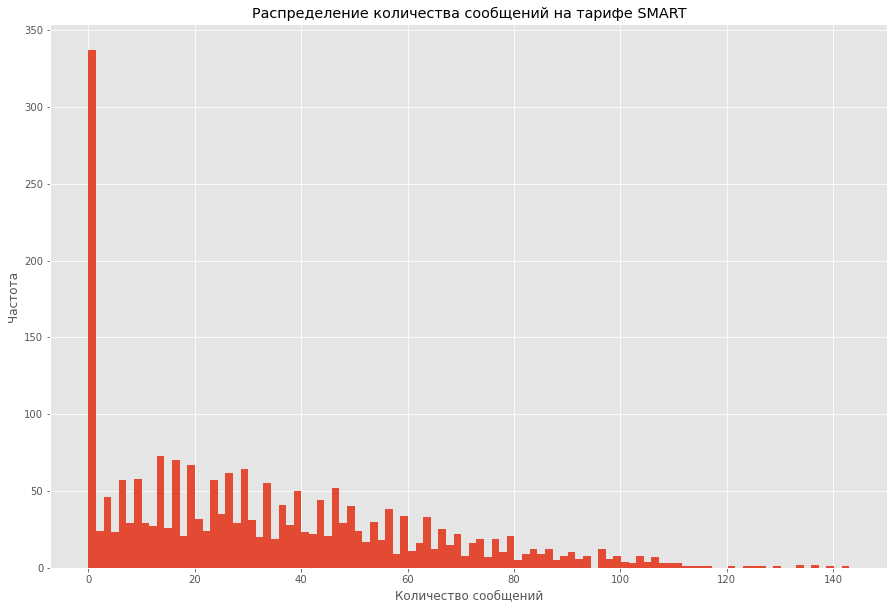

In [63]:
# строим гистограмму по количеству сообщений, которые отсылают пользователи на тарифе SMART

info_smart.hist('messages_count', bins=100)
plt.ylabel('Частота') # название оси ординат
plt.xlabel('Количество сообщений') # название оси абцисс
plt.title('Распределение количества сообщений на тарифе SMART') # заголовок графика
plt.show()

На гистограмме явно виден выбивающийся пик нулевого значения, после отметки в 50 сообщений их количество экспоненциально снижается, огрничим верхнюю границу в 75 сообщений.

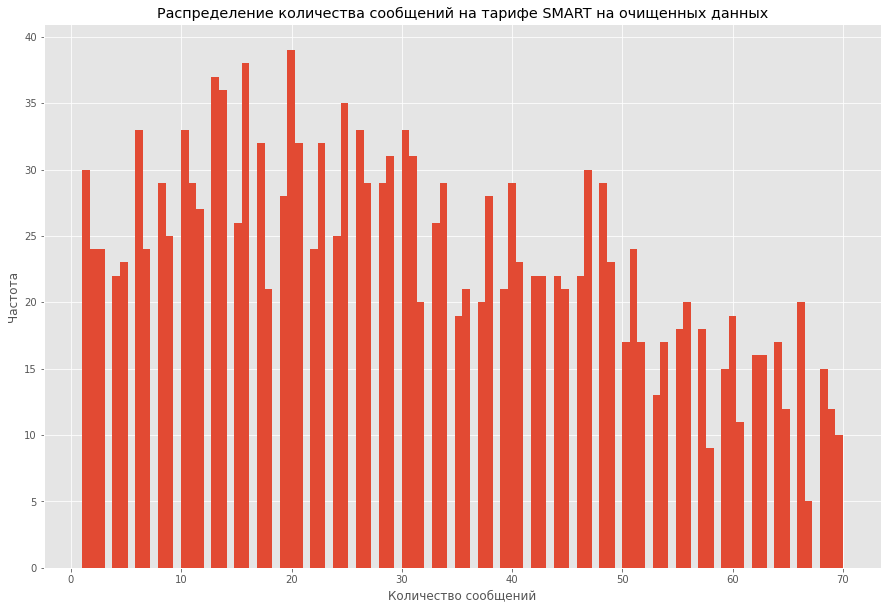

In [64]:
# сделаем срез таблицы по заданным значениям столбца с количеством сообщений

info_smart_slice = info_smart.query('0 < messages_count <= 70 ')
info_smart_slice.hist('messages_count', bins=100) # строим новую гистограмму
plt.ylabel('Частота') # название оси ординат
plt.xlabel('Количество сообщений') # название оси абцисс
plt.title('Распределение количества сообщений на тарифе SMART на очищенных данных') # заголовок графика
plt.show()

In [65]:
info_smart_slice['messages_count'].describe()

count    1662.000000
mean       30.941637
std        18.691438
min         1.000000
25%        15.000000
50%        29.000000
75%        46.000000
max        70.000000
Name: messages_count, dtype: float64

In [66]:
# Вычисляем дисперсию

var_messages_smart = np.var(info_smart['messages_count'], ddof=1)
var_messages_smart

796.8129584480083

In [67]:
# вычисляем стандартное отклонение

std_messages_smart = np.std(info_smart['messages_count'], ddof=1)
std_messages_smart

28.22787555676141

In [68]:
info_smart['mb_used'].describe()

count     2229.000000
mean     16229.188425
std       5877.576978
min          0.000000
25%      12658.000000
50%      16531.000000
75%      20068.000000
max      38610.000000
Name: mb_used, dtype: float64

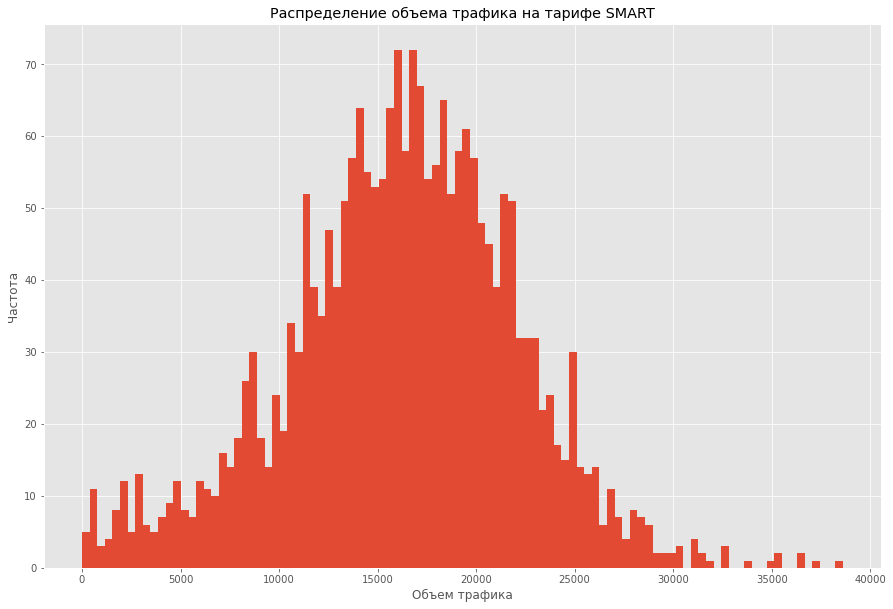

In [69]:
# строим гистограмму по объему трафика, использованного на тарифе SMART

info_smart.hist('mb_used', bins=100)
plt.ylabel('Частота') # название оси ординат
plt.xlabel('Объем трафика') # название оси абцисс
plt.title('Распределение объема трафика на тарифе SMART') # заголовок графика
plt.show()

Очистим информацию об интернет-трафике от выбросов: ограничим количество использованных мегабайтов от 7000 до 22000 Mb.

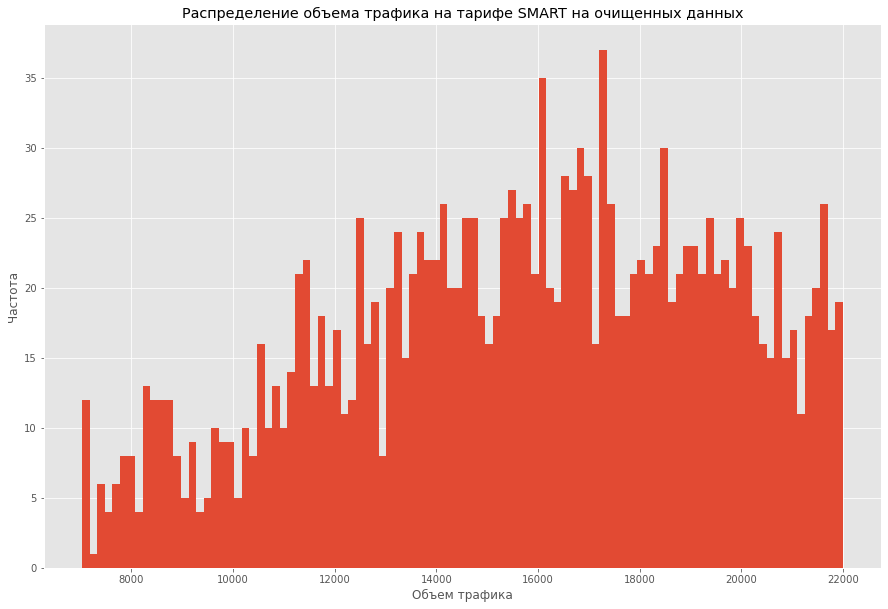

In [70]:
# делаем срез данных таблицу по заданным значениям и строим новую гистограмму

info_smart_slice = info_smart.query('7000 <= mb_used <= 22000')
info_smart_slice.hist('mb_used', bins=100)
plt.ylabel('Частота') # название оси ординат
plt.xlabel('Объем трафика') # название оси абцисс
plt.title('Распределение объема трафика на тарифе SMART на очищенных данных') # заголовок графика
plt.show()

In [71]:
info_smart_slice['mb_used'].describe()

count     1756.000000
mean     15671.900342
std       3757.587980
min       7027.000000
25%      13026.250000
50%      16008.000000
75%      18709.000000
max      21997.000000
Name: mb_used, dtype: float64

In [72]:
# вычисляем дисперсию

var_internet_smart = np.var(info_smart['mb_used'], ddof=1)
var_internet_smart

34545911.126957536

In [73]:
# вычисляем стандартное отклонение

std_internet_smart = np.std(info_smart['mb_used'], ddof=1)
std_internet_smart

5877.576977544193

In [74]:
print('Общая выручка по всем пользователям за все месяца на тарифе SMART', info_smart['monthly_proceeds'].sum())

Общая выручка по всем пользователям за все месяца на тарифе SMART 2885751.0


In [75]:
smart_proceeds_per_one = (info_smart['monthly_proceeds'].sum()) / 351
print('Средняя выручка с одного пользователя за год', smart_proceeds_per_one.round())

Средняя выручка с одного пользователя за год 8222.0


**Так же посчитаем дисперсию для месячной выручки на тарифе ULTRA.**

In [76]:
var_monthly_proceeds_smart = np.var(info_smart['monthly_proceeds'], ddof=1)
var_monthly_proceeds_smart

673931.3213632499

Выполним те же вычисления для тарифа ULTRA.

In [77]:
info_ultra['call_duration'].describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: call_duration, dtype: float64

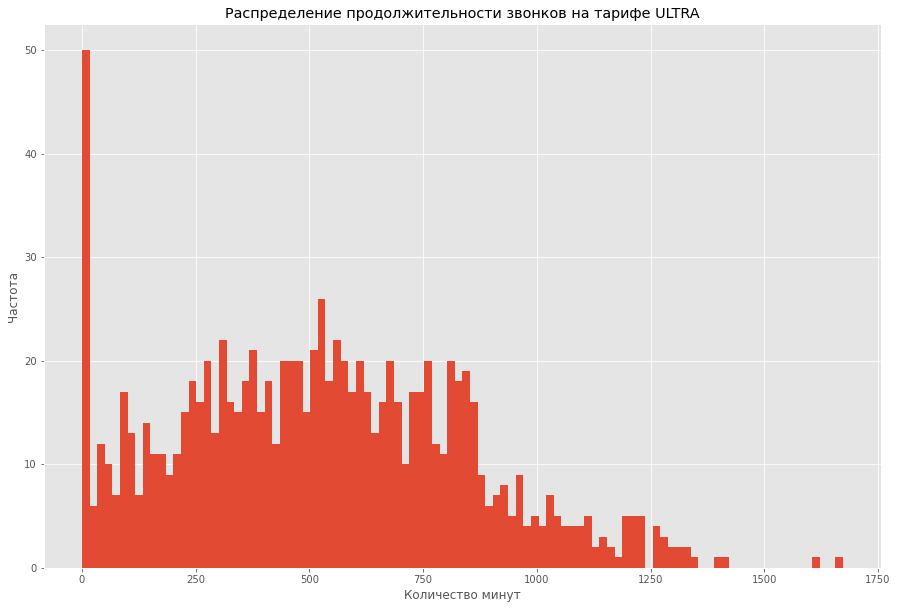

In [78]:
# построим гистограмму по длительности звонков на тарифе ULTRA

info_ultra.hist('call_duration', bins=100)
plt.ylabel('Частота') # название оси ординат
plt.xlabel('Количество минут') # название оси абцисс
plt.title('Распределение продолжительности звонков на тарифе ULTRA') # заголовок графика
plt.show()

По гистограмме выден выброс на нуле, а так же редкие значения после 1000 минут, ограничим значения от 0 до 750 минут.

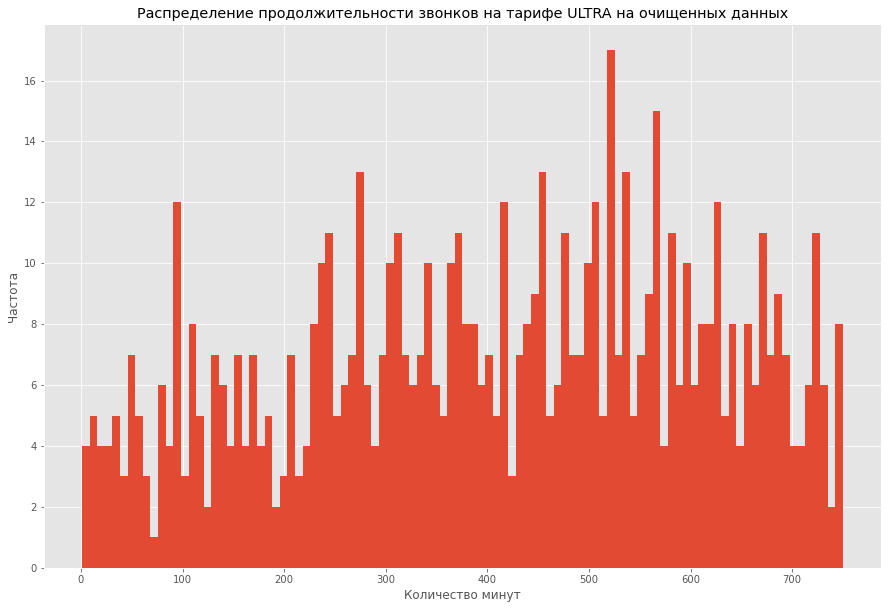

In [79]:
# делаем срез данных таблицы по длительности звонков, построим новую гистограмму

info_ultra_slice = info_ultra.query('0 < call_duration <= 750')
info_ultra_slice.hist('call_duration', bins=100)
plt.ylabel('Частота') # название оси ординат
plt.xlabel('Количество минут') # название оси абцисс
plt.title('Распределение продолжительности звонков на тарифе ULTRA на очищенных данных') # заголовок графика
plt.show()

In [80]:
info_ultra_slice['call_duration'].describe()

count    697.000000
mean     406.352941
std      200.683012
min        1.000000
25%      253.000000
50%      420.000000
75%      569.000000
max      750.000000
Name: call_duration, dtype: float64

In [81]:
# вычисляем диспресию

var_calls_ultra = np.var(info_ultra['call_duration'], ddof=1)
var_calls_ultra

100873.63339730087

In [82]:
# вычисляем стандартное отклонение

std_calls_ultra = np.std(info_ultra['call_duration'], ddof=1)
std_calls_ultra

317.60609785912624

In [83]:
info_ultra['messages_count'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages_count, dtype: float64

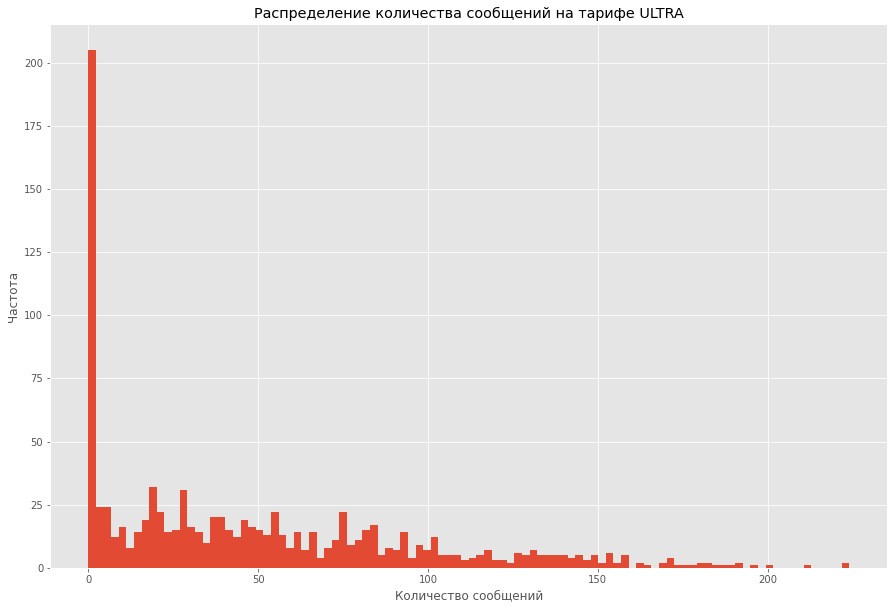

In [84]:
# строим гистограмму по количеству сообщений, отправленных пользователями с тарифом ULTRA

info_ultra.hist('messages_count', bins=100)
plt.ylabel('Частота') # название оси ординат
plt.xlabel('Количество сообщений') # название оси абцисс
plt.title('Распределение количества сообщений на тарифе ULTRA') # заголовок графика
plt.show()

Снова наблюдаем пик на 0, отбросим это значение и верхнюю границу поставим на 81 сообщение.

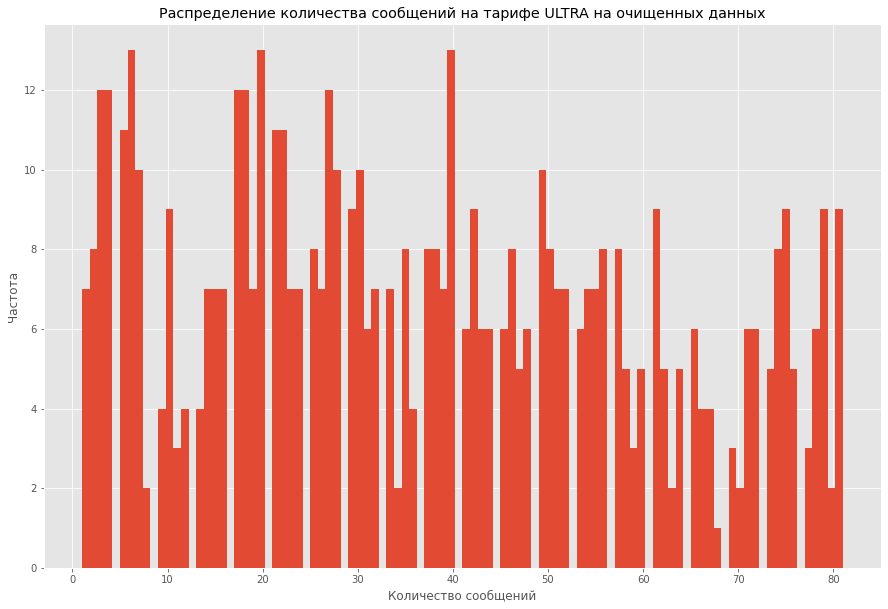

In [85]:
# делаем срез данных таблицы по количеству сообщений и строим новую гистограмму

info_ultra_slice = info_ultra.query('0 < messages_count <= 81')
info_ultra_slice.hist('messages_count', bins=100)
plt.ylabel('Частота') # название оси ординат
plt.xlabel('Количество сообщений') # название оси абцисс
plt.title('Распределение количества сообщений на тарифе ULTRA на очищенных данных') # заголовок графика
plt.show()

In [86]:
info_ultra_slice['messages_count'].describe()

count    568.000000
mean      37.093310
std       22.932077
min        1.000000
25%       18.000000
50%       35.000000
75%       55.000000
max       81.000000
Name: messages_count, dtype: float64

In [87]:
# вычисляем дисперсию

var_messages_ultra = np.var(info_ultra['messages_count'], ddof=1)
var_messages_ultra

2285.2661425446818

In [88]:
# вычисляем стандартное отклонение

std_messages_ultra = np.std(info_ultra['messages_count'], ddof=1)
std_messages_ultra

47.8044573501748

In [89]:
info_ultra['mb_used'].describe()

count      985.000000
mean     19486.901523
std      10096.317202
min          0.000000
25%      11785.000000
50%      19324.000000
75%      26863.000000
max      49789.000000
Name: mb_used, dtype: float64

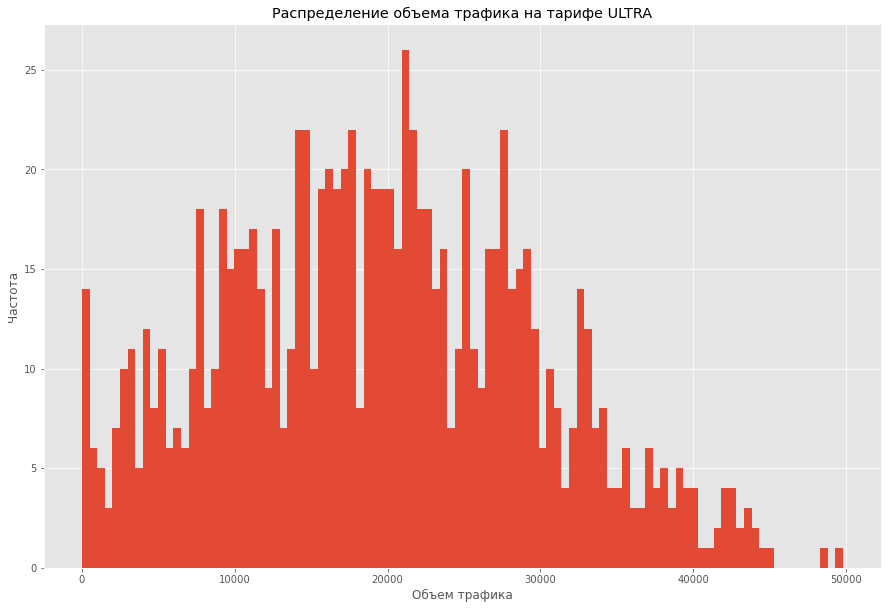

In [90]:
# строим гистограмму по объему интернет-трафика, использованного на тарифе ULTRA

info_ultra.hist('mb_used', bins=100)
plt.ylabel('Частота') # название оси ординат
plt.xlabel('Объем трафика') # название оси абцисс
plt.title('Распределение объема трафика на тарифе ULTRA') # заголовок графика
plt.show()

Очистим информацию об интернет-трафике от выбросов: ограничим количество использованных мегабайтов от 7000 до 30000 Mb.

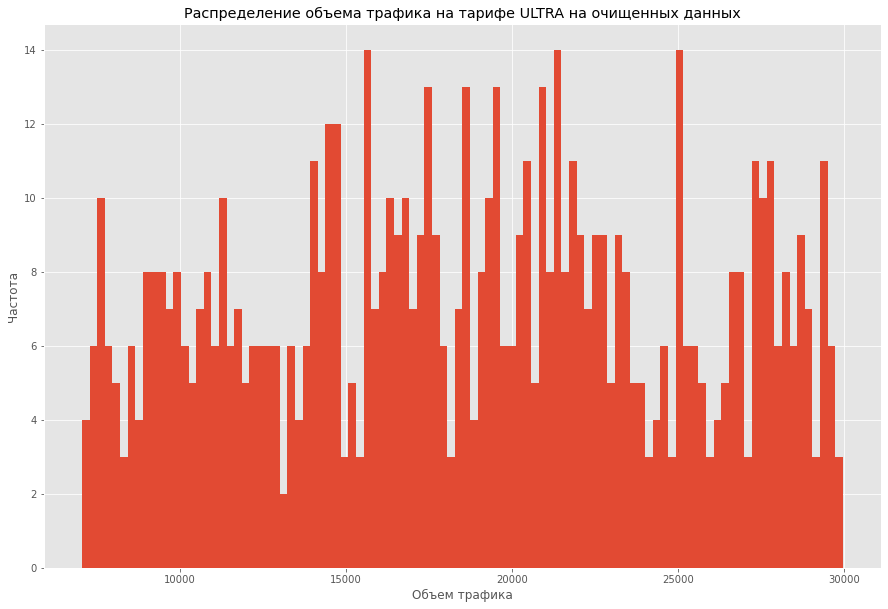

In [91]:
# делаем срез данных таблицы по объему интернет-трафика и строим новую гистограмму

info_ultra_slice = info_ultra.query('7000 <= mb_used <= 30000')
info_ultra_slice.hist('mb_used', bins=100)
plt.ylabel('Частота') # название оси ординат
plt.xlabel('Объем трафика') # название оси абцисс
plt.title('Распределение объема трафика на тарифе ULTRA на очищенных данных') # заголовок графика
plt.show()

In [92]:
info_ultra_slice['mb_used'].describe()

count      725.000000
mean     18649.411034
std       6315.026934
min       7048.000000
25%      13764.000000
50%      18722.000000
75%      23545.000000
max      29969.000000
Name: mb_used, dtype: float64

In [93]:
# вычисляем дисперсию

var_internet_ultra = np.var(info_ultra['mb_used'], ddof=1)
var_internet_ultra

101935621.04821914

In [94]:
# вычисляем стандартное отклонение

std_internet_ultra = np.std(info_ultra['mb_used'], ddof=1)
std_internet_ultra

10096.317202238604

Посчитаем диспресию для месячной выручки.

In [95]:
var_monthly_proceeds_ultra = np.var(info_ultra['monthly_proceeds'], ddof=1)
var_monthly_proceeds_ultra

143491.2405596106

In [96]:
print('Общая выручка по всем пользователям за все месяца на тарифе ULTRA', info_ultra['monthly_proceeds'].sum())

Общая выручка по всем пользователям за все месяца на тарифе ULTRA 2040000.0


In [97]:
ultra_proceeds_per_one = (info_ultra['monthly_proceeds'].sum()) / 149
print('Средняя выручка с одного пользователя за год', ultra_proceeds_per_one.round())

Средняя выручка с одного пользователя за год 13691.0


### ВЫВОД
- Для тарифа SMART характерны следующие цифрры использования: 422 минуты на звонки, 28 сообщения и 16531 Mb интернет-трафика, выручка со всех пользователей за год - 2 749 786 рублей.
- Для тарифа ULTRA характерны следующие цифрры использования: 518 минут на звонки, 38 сообщений и 19324 Mb интернет-трафика, средняя выручка со всех пользователей за год - 2 029 690 рублей.

## ПРОВЕРКА ГИПОТЕЗ

Имеем две гипотезы для проверки: 
1. "Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается";
2. "Средняя выручка пользователей из Москвы отличается от выручки пользователей других регионов".

- Сформулируем нулевую гипотезу: "средняя выручка по тарифу "ULTRA" равна средней выручке по тарифу "SMART".
- Альтернативная гипотеза: "Средняя выручка пользователей тарифов "Ультра" "Смарт" различается".

Проверяем заданную гипотезу. На этапе анализа данных были подсчитаны дисперсии для месячной выручки: для тарифа SMART - 620699.7337862339, для тарифа ULTRA - 127060.63069002517, диспресии не равны, поэтому будет задавать параметр equal_var=False.

In [98]:
from scipy import stats as st

alpha = 0.05 # задаем критический уровень статистической значимости

# проверим гипотезу о равенстве средних двух независимых совокупностей

results =  st.ttest_ind(info_smart['monthly_proceeds'], info_ultra['monthly_proceeds'], equal_var=False)

print('p-значение:', results.pvalue) # выведим на экран полученное p-значение)

if results.pvalue < alpha: # сравниваем p-значение с заданным критическим уровнем стат. значимости):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу и следовательно делаем вывод, что выручки по тарифам не равны.

- Сформулируем нулевую гипотезу: "Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов".
- Тогда наша изначальная гипотеза будет альтернативной: "Средняя выручка пользователей тарифов "Ультра" "Смарт" различается".

Для того, чтобы продолжить работу с гипотезой, проведем некоторые преобразования таблиц.

In [99]:
# объединяем таблицы с двумя тарифами в одну

common_info = info_ultra.append(info_smart)
common_info.head()

,user_id,month,call_duration,messages_count,mb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_proceeds
0,1000,August,408.0,81.0,14070.0,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,December,333.0,70.0,9827.0,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,July,340.0,75.0,14016.0,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,June,172.0,60.0,23257.0,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,May,159.0,22.0,2256.0,ultra,1000,30720,3000,1950,150,1,1,1950.0


In [100]:
# добавляем в получившуюся таблицу столбец с городом проживания пользователя

common_info = common_info.merge(users[['user_id', 'city']], how='left')
common_info.head()

,user_id,month,call_duration,messages_count,mb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_proceeds,city
0,1000,August,408.0,81.0,14070.0,ultra,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
1,1000,December,333.0,70.0,9827.0,ultra,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
2,1000,July,340.0,75.0,14016.0,ultra,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
3,1000,June,172.0,60.0,23257.0,ultra,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
4,1000,May,159.0,22.0,2256.0,ultra,1000,30720,3000,1950,150,1,1,1950.0,Краснодар


In [101]:
# создадим новую таблицу с пользователями из Москвы

proceeds_msk = common_info.query('city == "Москва"').reset_index()
proceeds_msk.head()                            

,index,user_id,month,call_duration,messages_count,mb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_proceeds,city
0,8,1003,August,380.0,37.0,8571.0,ultra,1000,30720,3000,1950,150,1,1,1950.0,Москва
1,9,1003,December,802.0,75.0,10132.0,ultra,1000,30720,3000,1950,150,1,1,1950.0,Москва
2,10,1003,November,824.0,94.0,11368.0,ultra,1000,30720,3000,1950,150,1,1,1950.0,Москва
3,11,1003,October,855.0,83.0,14779.0,ultra,1000,30720,3000,1950,150,1,1,1950.0,Москва
4,12,1003,September,961.0,91.0,12479.0,ultra,1000,30720,3000,1950,150,1,1,1950.0,Москва


In [102]:
# создадим новую таблицу с пользователями из остальных городов

proceeds_others = common_info.query('city != "Москва"').reset_index()
proceeds_others[['user_id', 'city']].head(10)

,user_id,city
0,1000,Краснодар
1,1000,Краснодар
2,1000,Краснодар
3,1000,Краснодар
4,1000,Краснодар
5,1000,Краснодар
6,1000,Краснодар
7,1000,Краснодар
8,1004,Новокузнецк
9,1004,Новокузнецк


In [103]:
# выполним проверку гипотезы

alpha = 0.05 # задаем критический уровень статистической значимости

# проверим гипотезу о равенстве средних двух независимых совокупностей
results_2 =  st.ttest_ind(proceeds_msk['monthly_proceeds'], proceeds_others['monthly_proceeds'], equal_var=False)

print('p-значение:', results_2.pvalue) # выведим на экран полученное p-значение)

if results_2.pvalue < alpha: # сравниваем p-значение с заданным критическим уровнем стат. значимости):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5126564657748214
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средняя выручка пользователей из Москвы и из других регионов и неодинакова, с вероятностью в почти 45% такое или большее различие можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о значимом различии между выручками.

# ВЫВОД

Мы провели анализ данных тарифов ULTRA и SMART на выборке в 500 пользователей.

В данных были обнаружены пропущенные значения, некорректные типы данных, пустые столбцы. На этапе предобработки это проблемы были решены.

Были составлены новые таблицы, содержащие информацию по количеству сделанных звонков и израсходованных минут разговора, количеству отправленных сообщений, по объему израсходованного интернет-трафика. Была посчитана помесячная выручка с каждого пользователя, было отмечено, что хотя в большинстве своим пользователям тарифа ULTRA хватает тарифного плана, а на тарифе SMART пользователи платят за дополнительные минуты, сообщения, трафик, в среднем пользователи тарифа ULTRA тратят на связь 2060 рублей в месяц, а на тарифе SMART - 1233 рубля в месяц.

Мы провели анализ данных, удалили выбросы и получили следующее:
- пользователям тарифа SMART в среднем в месяц требуется 422 минуты на звонки, 28 сообщения и 16531 Mb интернет-трафика;
- пользователям тарифа ULTRA в среднем в месяц требуется 518 минут на звонки, 38 сообщений и 19324 Mb интернет-трафика.

Была произведена проверка двух гипотез, мы сделали вывод о том, что выручки по тарифам не равны, а вот в зависимости от города такого утверждать не можем.

Пользователи тарифа UlTRA используют услуги активнее, чем пользователи тарифа SMART. Не смотря на то, что общегодовая выручка на тарифе SMART больше чем на тарифк ULTRA, на одного пользователя тарифа UlTRA в 1.7 раз больше выручки, при том, что 100% пользователей тарифа ULTRA не берут минуты и сообщения сверх тарифного плана.

Наиболее активно абоненты пользуются интернетом, на обоих тарифах есть пользователи, применяют трафик сверх тарифного плана.

Ориентируясь на нашу выборку, абонентов на тарифе SMART больше, не смотря на то, что пользователи чаще не укладываются в лимиты тарифного плана, типичные среднегодовые затраты на услуги меньше чем на тарифе ULTRA.